In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

In [3]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,315,328,346,346,346,386,386,396,458,462


In [4]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 176 entries, Province/State to 7/11/20
dtypes: float64(2), int64(172), object(2)
memory usage: 365.9+ KB


In [5]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.148043,22.538640,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,4.087190e+04,4.163942e+04,4.236509e+04,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04
std,24.909990,70.466256,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,2.035107e+05,2.077693e+05,2.115818e+05,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.075000e+02,2.075000e+02,2.092500e+02
50%,23.488100,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.210000e+03,1.219500e+03,1.223500e+03,1.232000e+03,1.234000e+03,1.237000e+03,1.268500e+03,1.280500e+03,1.280500e+03,1.344500e+03
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.163150e+04,1.180025e+04,1.194550e+04,1.207925e+04,1.216600e+04,1.231225e+04,1.248650e+04,1.262450e+04,1.272250e+04,1.283775e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,2.742049e+06,2.795361e+06,2.841241e+06,2.891124e+06,2.936077e+06,2.996098e+06,3.054699e+06,3.117946e+06,3.184573e+06,3.245925e+06


In [6]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,717,719,719,720,721,724,724,726,727,727
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,303,309,309,311,311,311,313,314,314,317
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,35,35,35,79,91,91,91,134,184,184


In [7]:
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366
Albania,0,0,0,0,0,0,0,0,0,0,...,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371
Algeria,0,0,0,0,0,0,0,0,0,0,...,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,315,328,346,346,346,386,386,396,458,462


In [8]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=188)

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [10]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20',
       '7/9/20', '7/10/20', '7/11/20'],
      dtype='object', length=172)

In [11]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index)
# Check out index
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20',
       '7/9/20', '7/10/20', '7/11/20'],
      dtype='object', length=172)

In [12]:
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


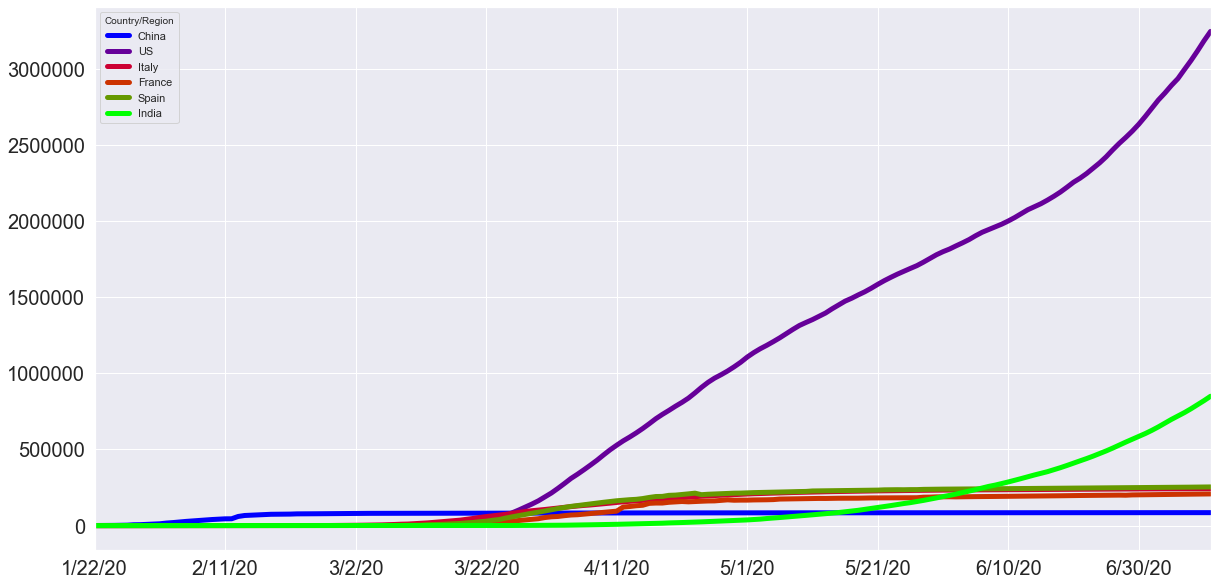

In [13]:
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'India']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

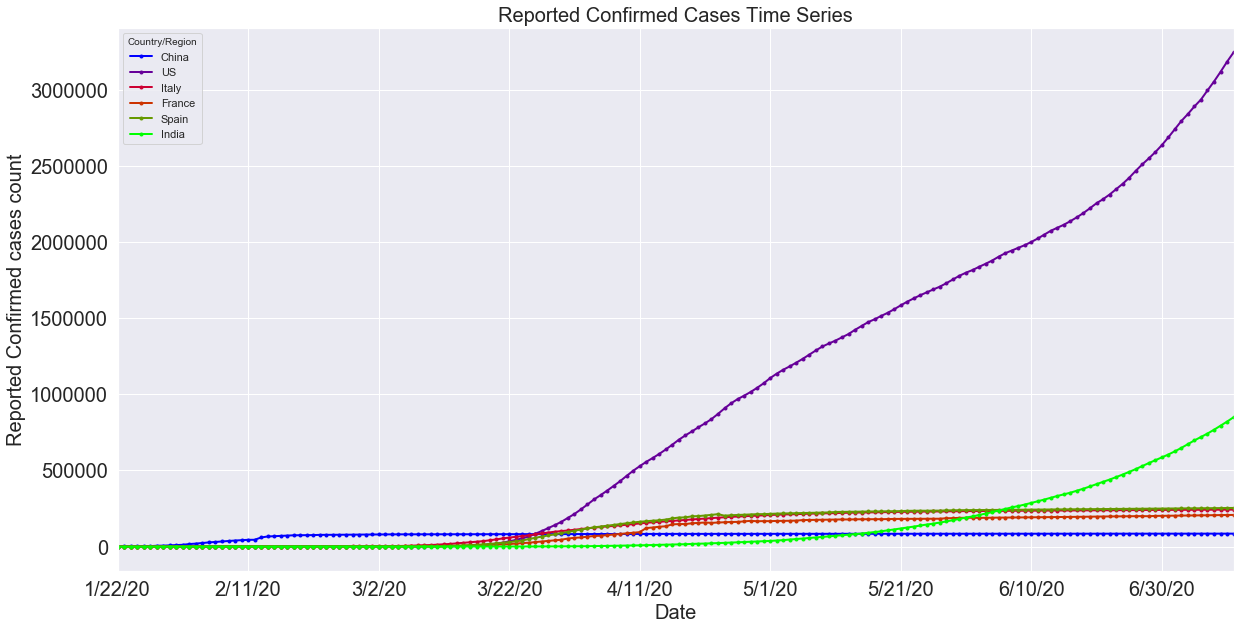

In [14]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

In [15]:
confirmed_cases = raw_data_confirmed.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [16]:
confirmed_cases.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,315,328,346,346,346,386,386,396,458,462


In [17]:
dates = confirmed_cases.columns[4:]

In [18]:
confirmed_cases.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,315,328,346,346,346,386,386,396,458,462


In [19]:
confirmed_cases = confirmed_cases.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

In [20]:
confirmed_cases.head()

,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [21]:
confirmed_cases = confirmed_cases.drop(['Lat','Long'],axis = 1)

In [22]:
confirmed_cases.head()

,Country/Region,Date,Confirmed
0,Afghanistan,1/23/20,0
1,Albania,1/23/20,0
2,Algeria,1/23/20,0
3,Andorra,1/23/20,0
4,Angola,1/23/20,0


In [23]:
confirmed_cases_US = confirmed_cases[confirmed_cases['Country/Region'] == 'US']

In [24]:
confirmed_cases_US.head()

,Country/Region,Date,Confirmed
174,US,1/23/20,1
362,US,1/24/20,2
550,US,1/25/20,2
738,US,1/26/20,5
926,US,1/27/20,5


In [25]:
confirmed_cases_US = confirmed_cases_US.drop('Country/Region',axis = 1)

In [26]:
confirmed_cases_US.head()

,Date,Confirmed
174,1/23/20,1
362,1/24/20,2
550,1/25/20,2
738,1/26/20,5
926,1/27/20,5


In [27]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,807,819,826,864,898,920,936,957,971,994
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,69,72,74,76,79,81,83,83,85,89
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,928,937,946,952,959,968,978,988,996,1004
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,18,19,19,19,21,21,22,23,23


In [28]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 176 entries, Province/State to 7/11/20
dtypes: float64(2), int64(172), object(2)
memory usage: 365.9+ KB


In [29]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11'],
              dtype='datetime64[ns]', length=172, freq=None)

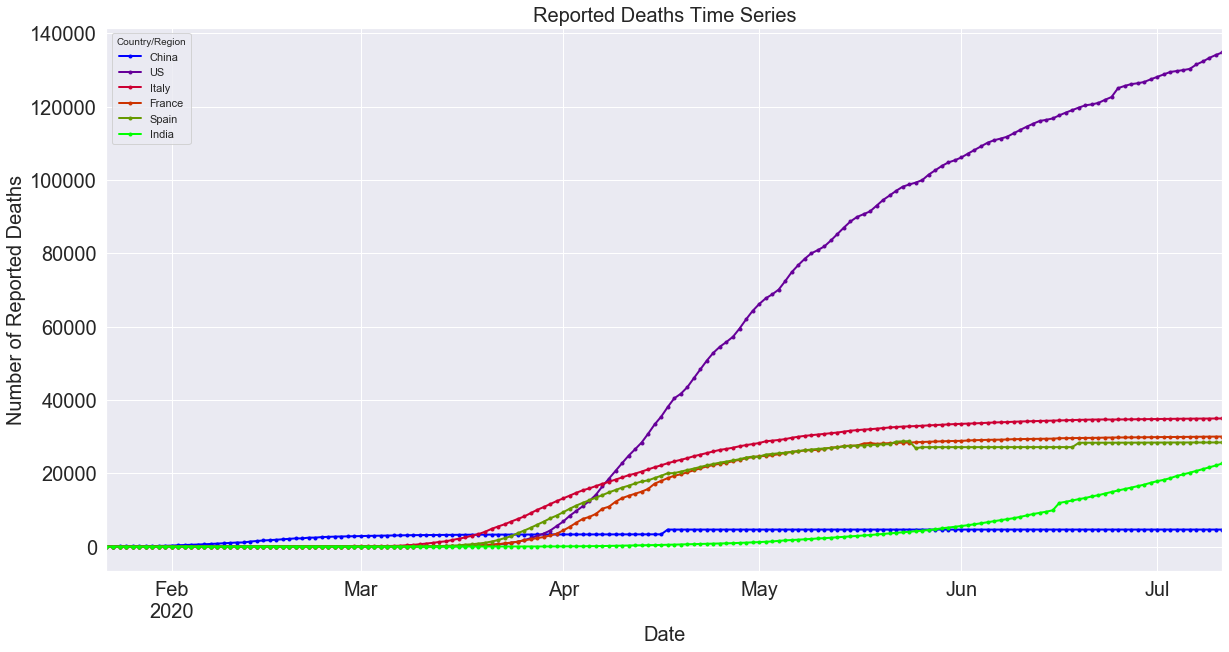

In [31]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [32]:
confirmed_death = raw_data_deaths.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [33]:
date = confirmed_death.columns[4:]

In [34]:
confirmed_death = confirmed_death.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=date, var_name='Date', value_name='Deaths')

In [35]:
confirmed_death.head()

,Country/Region,Lat,Long,Date,Deaths
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [36]:
confirmed_death_US = confirmed_death[confirmed_death['Country/Region'] == 'US']

In [37]:
confirmed_death_US.head()

,Country/Region,Lat,Long,Date,Deaths
174,US,37.0902,-95.7129,1/23/20,0
362,US,37.0902,-95.7129,1/24/20,0
550,US,37.0902,-95.7129,1/25/20,0
738,US,37.0902,-95.7129,1/26/20,0
926,US,37.0902,-95.7129,1/27/20,0


In [38]:
confirmed_death_US = confirmed_death.drop(['Lat','Long','Country/Region'],axis = 1)

In [39]:
confirmed_death_US.head()

,Date,Deaths
0,1/23/20,0
1,1/23/20,0
2,1/23/20,0
3,1/23/20,0
4,1/23/20,0


In [40]:
raw_data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,800,800,800,800,800,800,802,802,803,803
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,97,107,108,108,108,117,117,117,117,118


In [41]:
# Split-Apply-Combine
recovered_country = raw_data_recovered.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
recovered_country = recovered_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(recovered_country.index)
recovered_country.set_index(datetime_index, inplace=True)

# Check out head
recovered_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Check out the index
recovered_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11'],
              dtype='datetime64[ns]', length=172, freq=None)

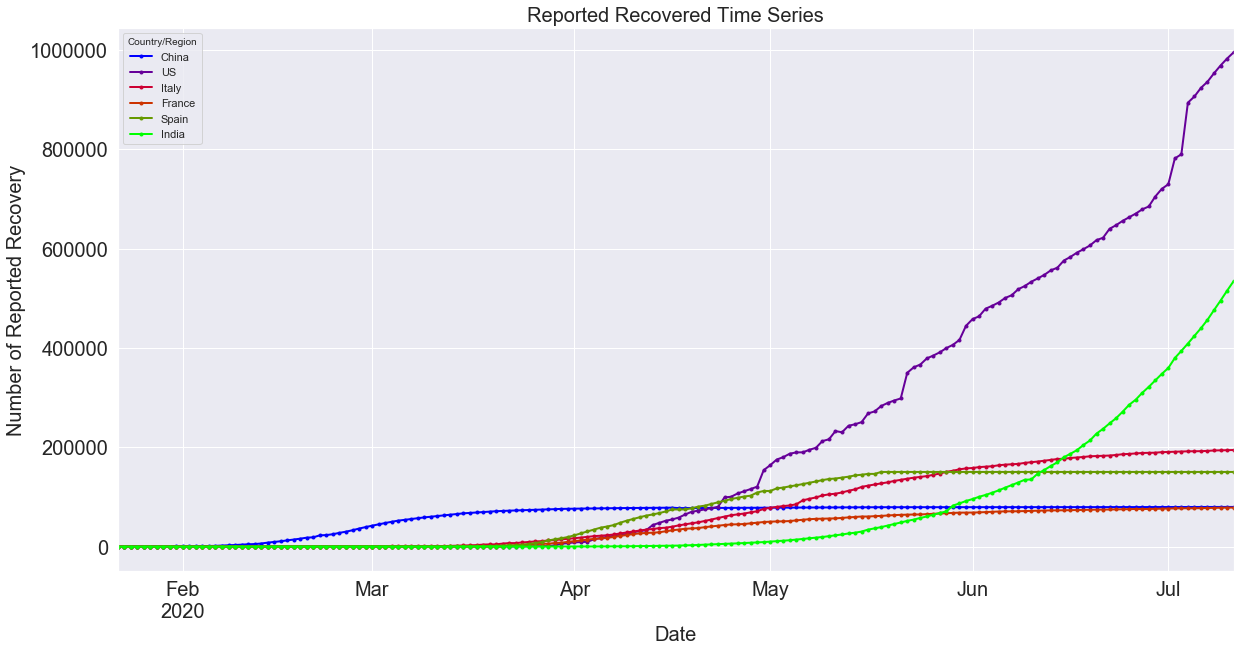

In [43]:
# Plot time series of several countries of interest
recovered_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Recovery', fontsize=20);
plt.title('Reported Recovered Time Series', fontsize=20);

In [44]:
recovered = raw_data_recovered.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [45]:
date = recovered.columns[4:]

In [46]:
recovered = recovered.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=date, var_name='Date', value_name='Recovered')

In [47]:
recovered.head()

,Country/Region,Lat,Long,Date,Recovered
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [48]:
recovered_US = recovered[recovered['Country/Region'] == 'US']

In [49]:
recovered_US.head()

,Country/Region,Lat,Long,Date,Recovered
174,US,37.0902,-95.7129,1/23/20,0
362,US,37.0902,-95.7129,1/24/20,0
550,US,37.0902,-95.7129,1/25/20,0
738,US,37.0902,-95.7129,1/26/20,0
926,US,37.0902,-95.7129,1/27/20,0


In [50]:
recovered_US = recovered_US.drop(['Country/Region','Lat','Long'],axis=1)

In [51]:
covid19 = pd.merge(confirmed_cases,confirmed_death)

In [52]:
covid19_global = pd.merge(covid19,recovered)

In [53]:
covid19_global.head()

,Country/Region,Date,Confirmed,Lat,Long,Deaths,Recovered
0,Afghanistan,1/23/20,0,33.0000,65.0000,0,0
1,Albania,1/23/20,0,41.1533,20.1683,0,0
2,Algeria,1/23/20,0,28.0339,1.6596,0,0
3,Andorra,1/23/20,0,42.5063,1.5218,0,0
4,Angola,1/23/20,0,-11.2027,17.8739,0,0


In [54]:
covid19_global = covid19_global.drop(['Lat','Long'],axis=1)

In [55]:
covid19_global.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,1/23/20,0,0,0
1,Albania,1/23/20,0,0,0
2,Algeria,1/23/20,0,0,0
3,Andorra,1/23/20,0,0,0
4,Angola,1/23/20,0,0,0


In [56]:
covid19_global['Date'] = pd.to_datetime(covid19_global['Date'])

In [57]:
covid19_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30096 entries, 0 to 30095
Data columns (total 5 columns):
Country/Region    30096 non-null object
Date              30096 non-null datetime64[ns]
Confirmed         30096 non-null int64
Deaths            30096 non-null int64
Recovered         30096 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [58]:
covid_datewise = covid19_global.set_index('Date')

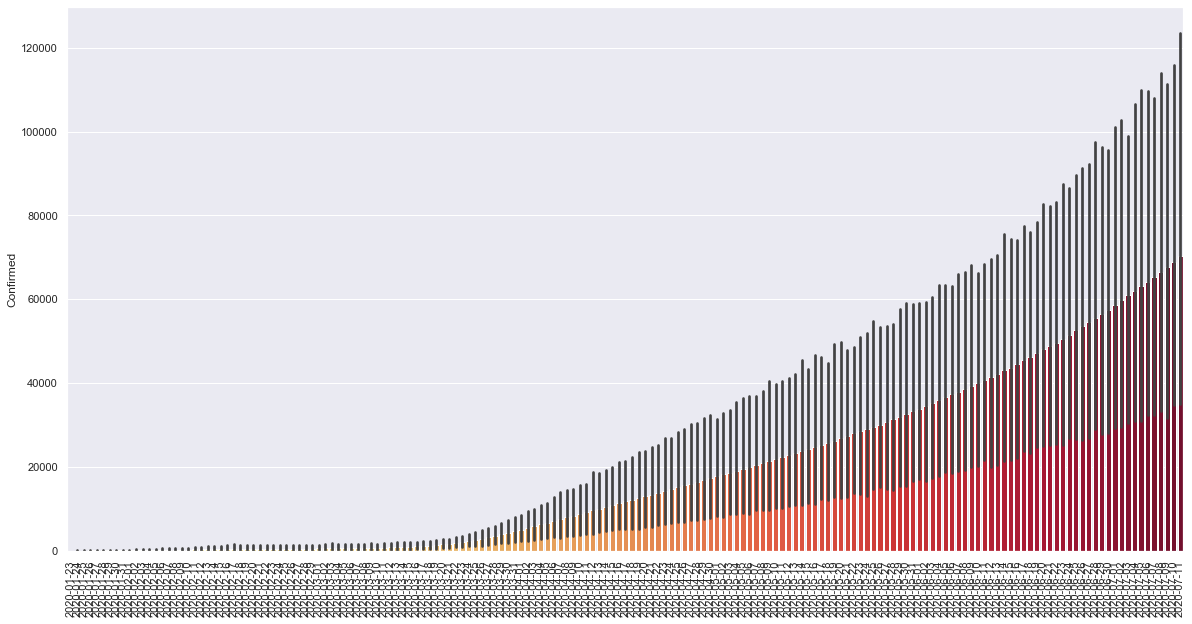

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x = covid_datewise.index.date, y = covid_datewise['Confirmed'], palette='YlOrRd')
plt.xticks(rotation = 90)
plt.show()

Statistical Analysis

In [82]:
raw_conf_df = pd.read_csv(confirmed_cases_data_url, index_col="Country/Region")
raw_death_df = pd.read_csv(death_cases_data_url, index_col="Country/Region") 
raw_rec_df = pd.read_csv(recovery_cases_data_url, index_col="Country/Region")

In [84]:
name_country = "US"
us_conf = raw_conf_df.loc[name_country]
us_deaths = raw_death_df.loc[name_country]
us_rec = raw_rec_df.loc[name_country]

In [85]:
us_conf[3:]

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
7/8/20     3054699
7/9/20     3117946
7/10/20    3184573
7/11/20    3245925
7/12/20    3304942
Name: US, Length: 173, dtype: object

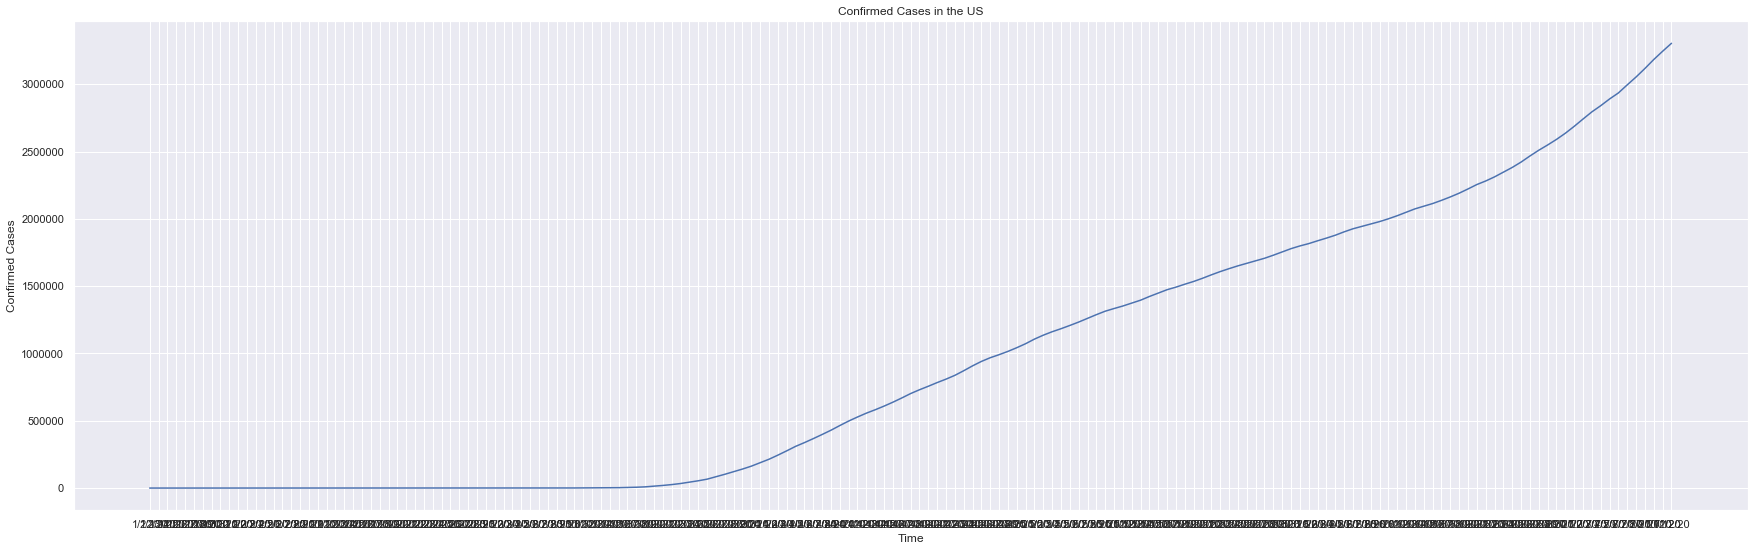

In [86]:
plt.figure(figsize=(30,9))
plt.title("Confirmed Cases in the US")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.plot(raw_conf_df.columns[3:], us_conf[3:])

In [87]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(us_conf[3:].values)
result

(2.6806678500092436,
 0.9990857536292896,
 10,
 162,
 {'1%': -3.471374345647024,
  '5%': -2.8795521079291966,
  '10%': -2.5763733302850174},
 2886.0805218644264)